In [1]:
%td_databases

,name,count,permission,created_at,updated_at
0,sample_datasets,8812278,query_only,2014-10-04 01:13:11+00:00,2015-01-09 01:07:14+00:00
1,console_production,290952710,query_only,2013-12-10 21:58:31+00:00,2014-04-09 05:29:06+00:00
2,metrics,131570280,query_only,2014-09-07 13:56:15+00:00,2014-09-07 13:56:34+00:00
3,api_production,19183300550,query_only,2013-05-08 22:07:07+00:00,2014-04-09 05:29:31+00:00
4,console_production_idcf,309371731,query_only,2014-10-28 20:47:34+00:00,2014-10-28 20:47:34+00:00
5,js_console_production,6266228,query_only,2014-06-25 20:01:29+00:00,2014-06-25 20:01:29+00:00
6,js_console_idcf_production,88301,query_only,2014-06-25 20:11:34+00:00,2015-04-28 00:47:22+00:00
7,api_production_idcf,1436107775,query_only,2014-05-08 00:48:17+00:00,2014-05-08 00:48:17+00:00


In [2]:
%td_tables

,db_name,name,count,estimated_storage_size,last_log_timestamp,created_at
0,sample_datasets,nasdaq,8807278,168205061,1970-01-01 00:00:00+00:00,2014-10-08 02:57:38+00:00
1,sample_datasets,www_access,5000,0,2014-10-04 01:13:15+00:00,2014-10-04 01:13:12+00:00
2,console_production,slow_query,56019,2592578,2015-07-24 10:41:32+00:00,2014-01-27 03:41:34+00:00
3,console_production,access,146054940,2641925897,2015-07-27 09:01:40+00:00,2013-12-10 21:58:31+00:00
4,console_production,aws_access,902086,8307581,2015-07-27 08:48:54+00:00,2014-03-03 21:08:13+00:00
5,console_production,slow_transactions,729,0,2014-09-23 18:35:55+00:00,2014-01-24 18:53:38+00:00
6,console_production,controller,143939066,3122566470,2015-07-27 09:01:40+00:00,2014-01-24 01:23:15+00:00
7,metrics,queue,17579494,19807493,2015-06-29 17:59:00+00:00,2014-09-28 16:15:43+00:00
8,metrics,presto_node,7859403,22470827,2015-07-27 07:59:00+00:00,2014-12-03 18:11:10+00:00
9,metrics,account_histories,1426120,23251063,2015-07-27 00:00:00+00:00,2014-11-10 16:41:26+00:00


In [3]:
%td_use sample_datasets

INFO: import nasdaq
INFO: import www_access


In [13]:
start = '2010-01-01'
end = '2010-02-01'

In [14]:
%%td_presto
select count(1) cnt
from nasdaq
where td_time_range(time,'{start}','{end}')

,cnt
0,37250


In [6]:
%matplotlib inline

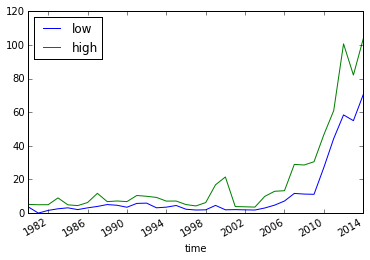

In [7]:
%%td_presto --plot
select
    -- x-axis
    td_date_trunc('year', time) time,

    -- y-axis
    min(low) low,
    max(high) high
from
    nasdaq
where
    symbol = 'AAPL'
group by
    1

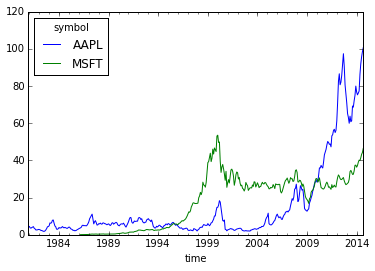

In [8]:
%%td_presto --plot
select
    -- x-axis
    td_date_trunc('month', time) time,

    -- dimensions
    symbol,

    -- measures (y-axis)
    avg(close) close 
from
    nasdaq
where
    symbol in ('AAPL', 'MSFT')
group by
    1, 2

In [3]:
!git add .

In [10]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   FirstCurry.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git commit -m "07/21/2015 00"

[master 6b12caa] 07/21/2015 00
 2 files changed, 12 insertions(+)
 create mode 100644 ryota/.ipynb_checkpoints/FirstCurry-checkpoint.ipynb
 create mode 100644 ryota/FirstCurry.ipynb


In [6]:
!git push

Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 534 bytes | 0 bytes/s, done.
Total 5 (delta 0), reused 0 (

In [1]:
!ls

FirstCurry.ipynb


In [2]:
!pwd

/Users/ryota/Temp/curryudon/ryota


In [11]:
!git status
!ls
!pwd

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   FirstCurry.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
FirstCurry.ipynb
/Users/ryota/Temp/curryudon/ryota


In [12]:
!git status
!git add .
!git commit -m "7/27/2015 hoge"
!git push

[master 0d5aae7] 7/27/2015 hoge
 1 file changed, 1167 insertions(+), 2 deletions(-)
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 34.37 KiB | 0 bytes/s, done.
Total 4 (delta 1), reused 0 (delta 0)
To git@github.com:ryota5641/curryudon.git
   6b12caa..0d5aae7  master -> master
